### Problem Statement:

The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health 
insurance carrier and its plans and perks while keeping the projected cost from our 
study in mind. This can assist a person in concentrating on the health side of an 
insurance policy rather han the ineffective part.


### Features of the Dataset:

**1. Age:** Insured Person's age in years.

**2. Sex:** Insured Person's gender(Male or Female).

**3. BMI:** Body mass index of the Insured Person.

**4. Children:** Children of the Insured Person.

**5. Smoker:** Insured Person is smoking or not.

**6. Region:** Insured Person belongs to which region.

**7. Expenses:** Expenses of the insured person.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
insurance_df = pd.read_csv("C:\\Users\\acer\\FSDS\\PROJECTS\\ML\\insurance_premium_prediction\\insurance_premium_dataset\\insurance.csv")
print("Shape of the dataset: ",insurance_df.shape, "\n")
print(insurance_df.head())

Shape of the dataset:  (1338, 7) 

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [32]:
## statistical info of the dataset

## numerical data
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [33]:
## categorical data
insurance_df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [34]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Handle missing values

In [35]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### Observation:1
  
  Total no of records: 1338

  numerical features: age, bmi, children, expenses
  
  categorical feature: sex, smoker, region

So, there are no missing values present in the dataset

### Check for duplicate reords

In [37]:
insurance_df.duplicated().sum()

1

In [38]:
insurance_df.drop_duplicates(inplace = True)

In [39]:
insurance_df.shape

(1337, 7)

### Univariate Analysis

In [44]:
data = insurance_df.copy()
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


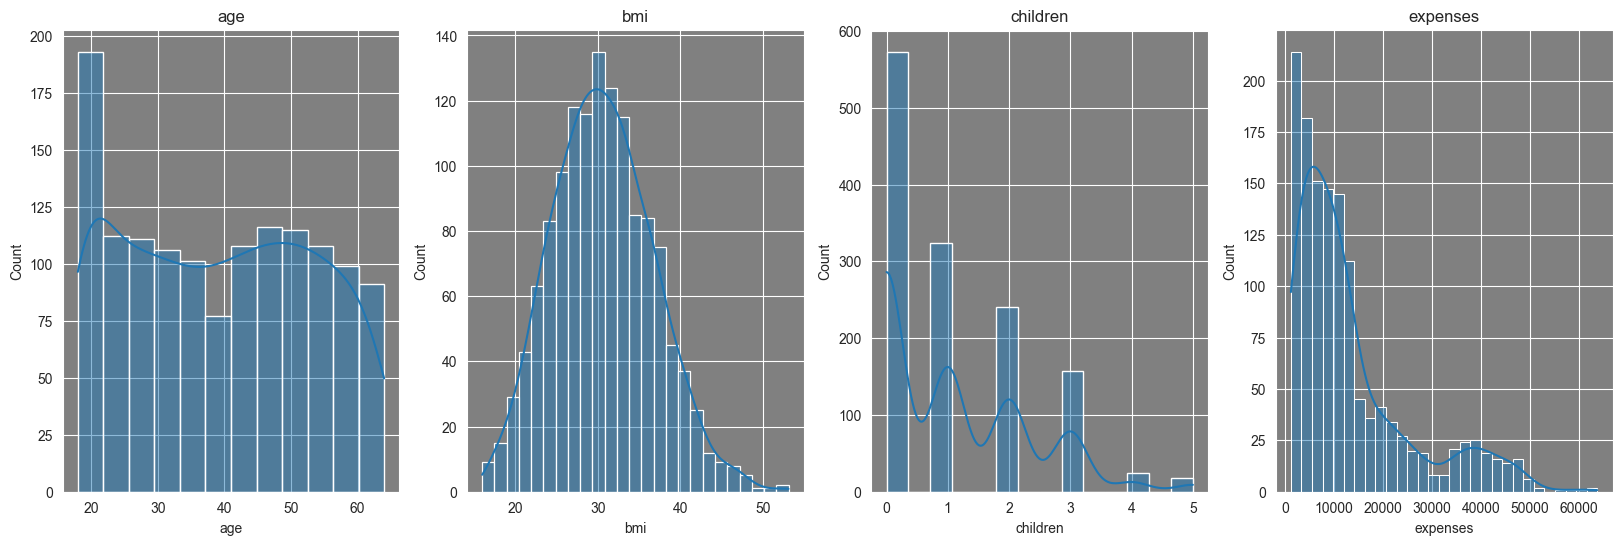

In [65]:
fig, axes = plt.subplots(1,4)   
axes = axes.flatten()        
fig.set_size_inches(20,6)
num_col = [col for col in data.columns if data[col].dtype!="O"]

for ax, col in zip(axes,num_col):

  sns.set_style("darkgrid", {"axes.facecolor": ".5"})
  sns.histplot(data[col], ax = ax,kde= True)
  ax.set_title(col)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: Futur

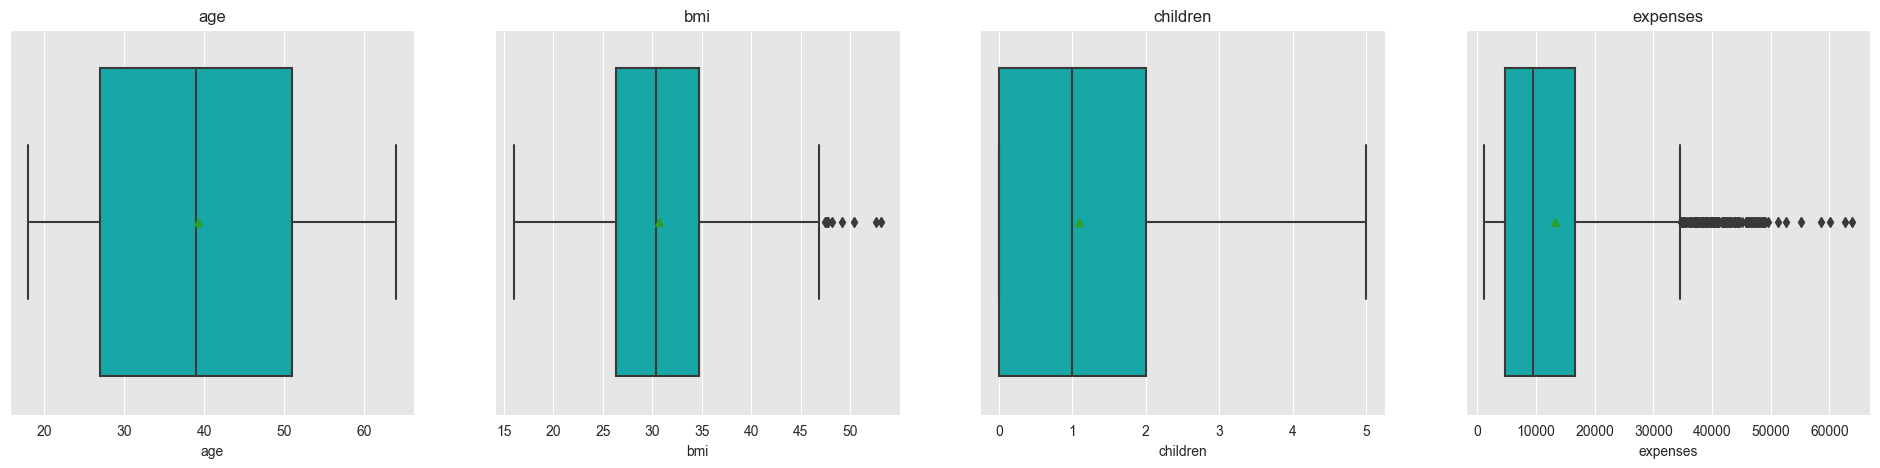

In [67]:
fig, axes = plt.subplots(1,4)   
axes = axes.flatten()        
fig.set_size_inches(24,5)
num_col = [col for col in data.columns if data[col].dtype!="O"]

for ax, col in zip(axes,num_col):
  sns.set_style("darkgrid", {"axes.facecolor": ".5"})
  sns.boxplot(data[col], ax = ax,showmeans=True,color= 'c')
  ax.set_title(col)

### Observation2:
1. Age: Following Uniform distribution. Maximum Person's Age between 18 to 20.
2. BMI: Following Normal distribution. Mean is at 30. Few outliers are present in this feature.
3. Expenses: Following power law distriution and highly right skewed.

### Region and Sex

In [73]:
print(data["region"].value_counts())


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


<AxesSubplot:ylabel='sex'>

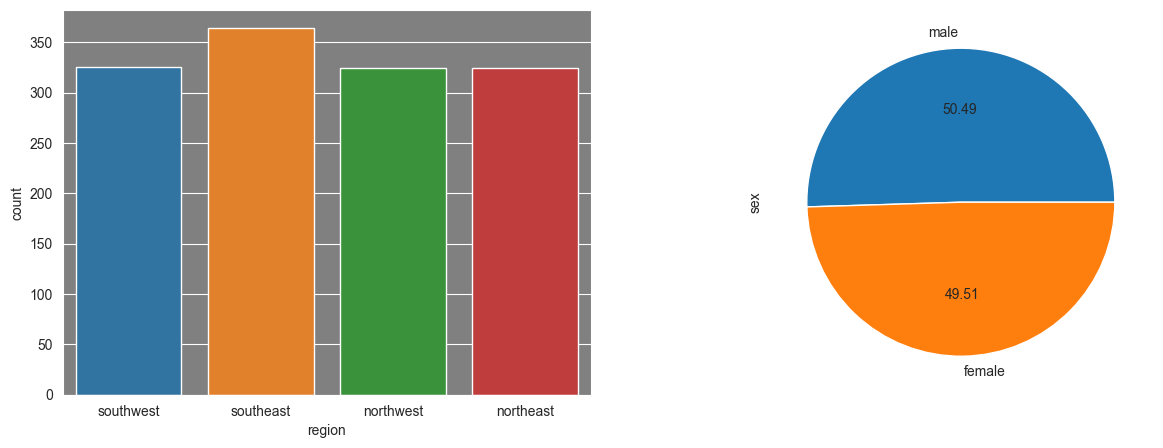

In [74]:
fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(15,5)
sns.set_style("darkgrid", {"axes.facecolor": ".5"})
sns.countplot(ax= axes[0], data = data, x="region")
data["sex"].value_counts().plot(kind='pie',autopct= "%.2f")

### Observation 3

1. region: No. of insured person per region are almost same.
2. sex:    almost 50% male and 50% female

### Smoker vs Sex

In [75]:
print(data["smoker"].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


<AxesSubplot:ylabel='smoker'>

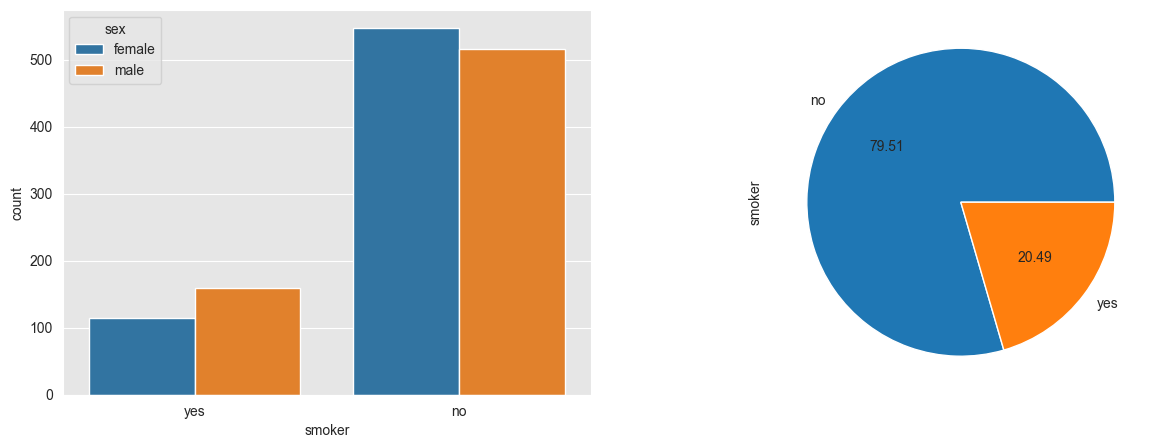

In [86]:
fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(15,5)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.countplot(ax= axes[0], data = data, x="smoker",hue= 'sex')
data["smoker"].value_counts().plot(kind='pie',autopct= "%.2f")

### Observation 4

only 20% of the Insure Person are smoking in which no. of male are more

### Bi-variate Anlysis

### expenses vs numerical features

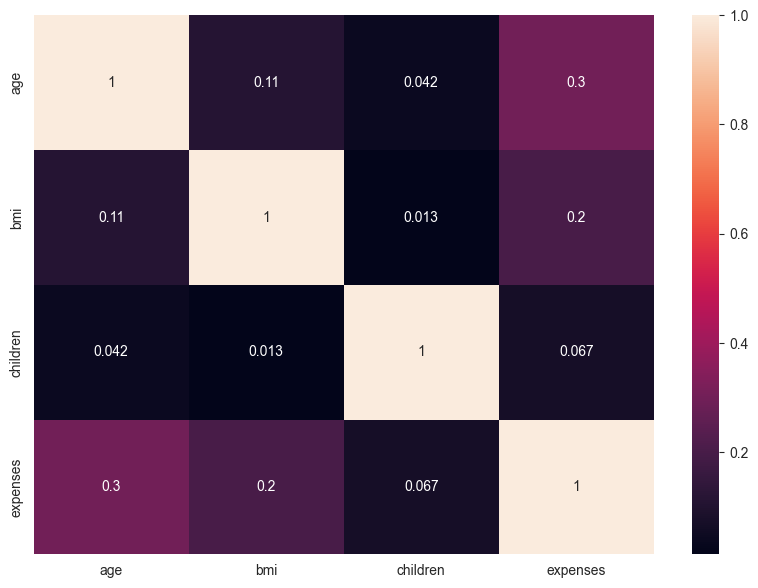

In [89]:
plt.figure(figsize= (10,7))
corr = data.corr()
ax = sns.heatmap(corr,annot=True)

 Age and Bmi have more corelation with expenses

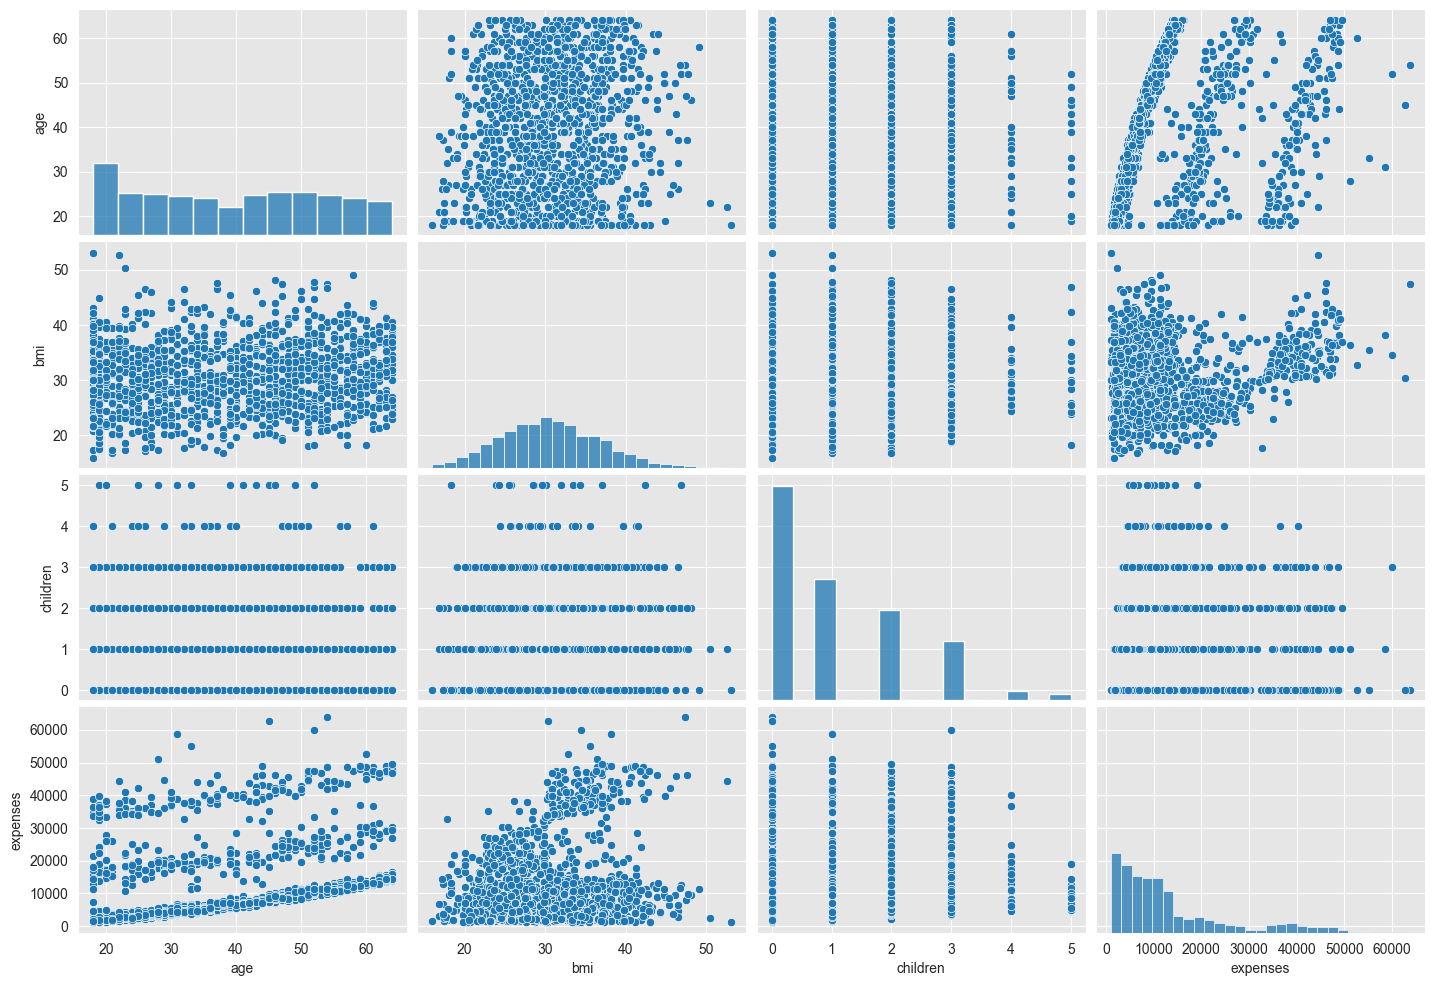

In [90]:
figure = sns.pairplot(data)
figure.fig.set_size_inches(15,10)

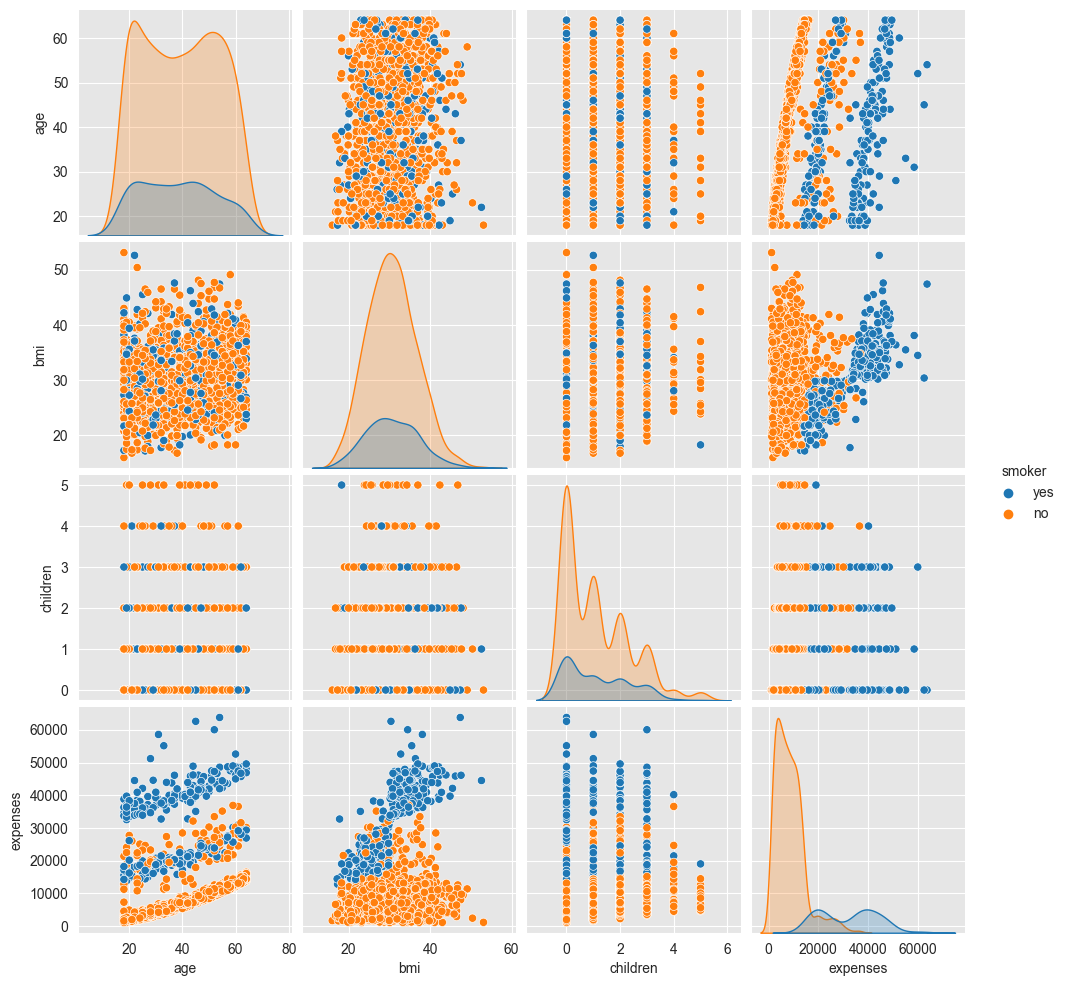

In [91]:
sns.pairplot(data,hue = 'smoker')

### Bmi Vs Expenses w.r.t smoker

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'age vs expenses')

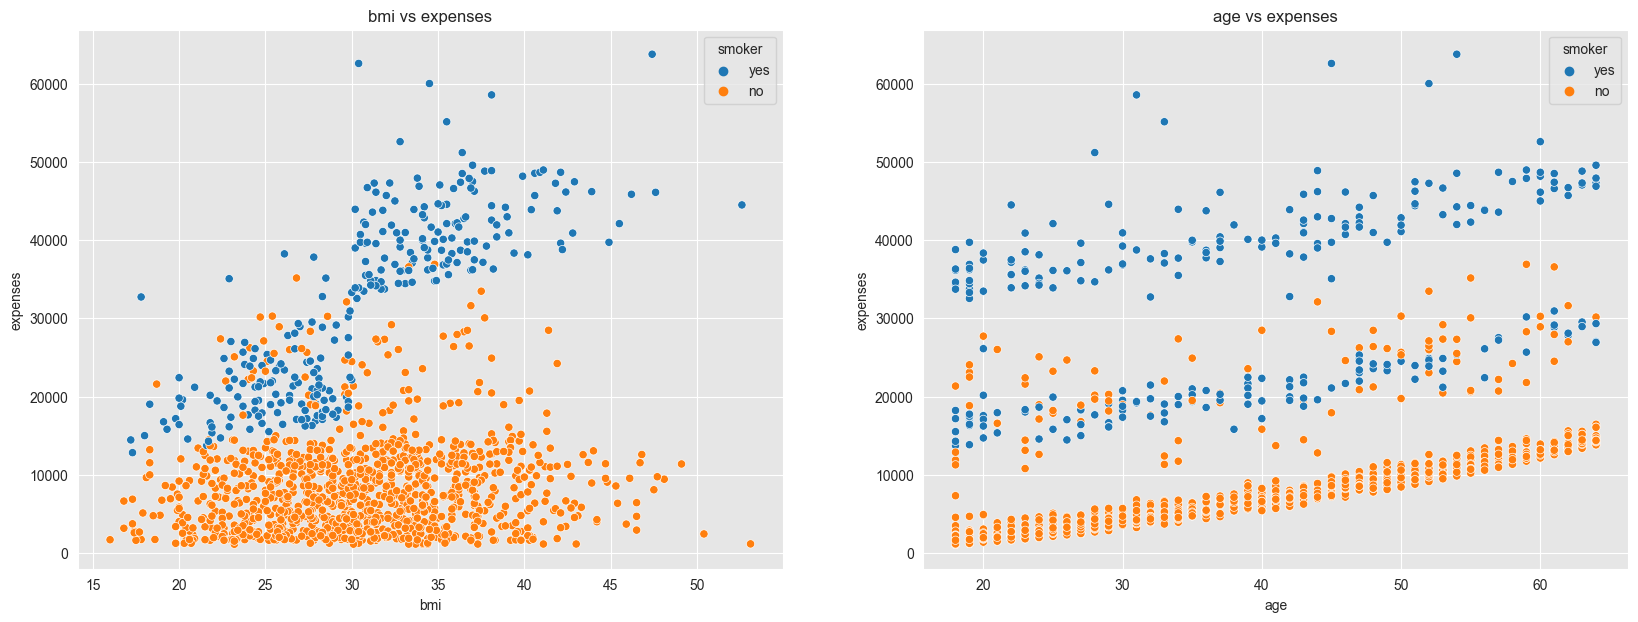

In [103]:
fig, axes = plt.subplots(1,2)   
axes = axes.flatten()        
fig.set_size_inches(20,7)
sns.scatterplot(insurance_df["bmi"],data["expenses"],ax=axes[0],hue=data["smoker"])
axes[0].set_title("bmi vs expenses")
sns.scatterplot(data["age"],data["expenses"],ax=axes[1],hue=data["smoker"])
axes[1].set_title("age vs expenses")

### categorical_features vs expenses

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses', ylabel='smoker'>

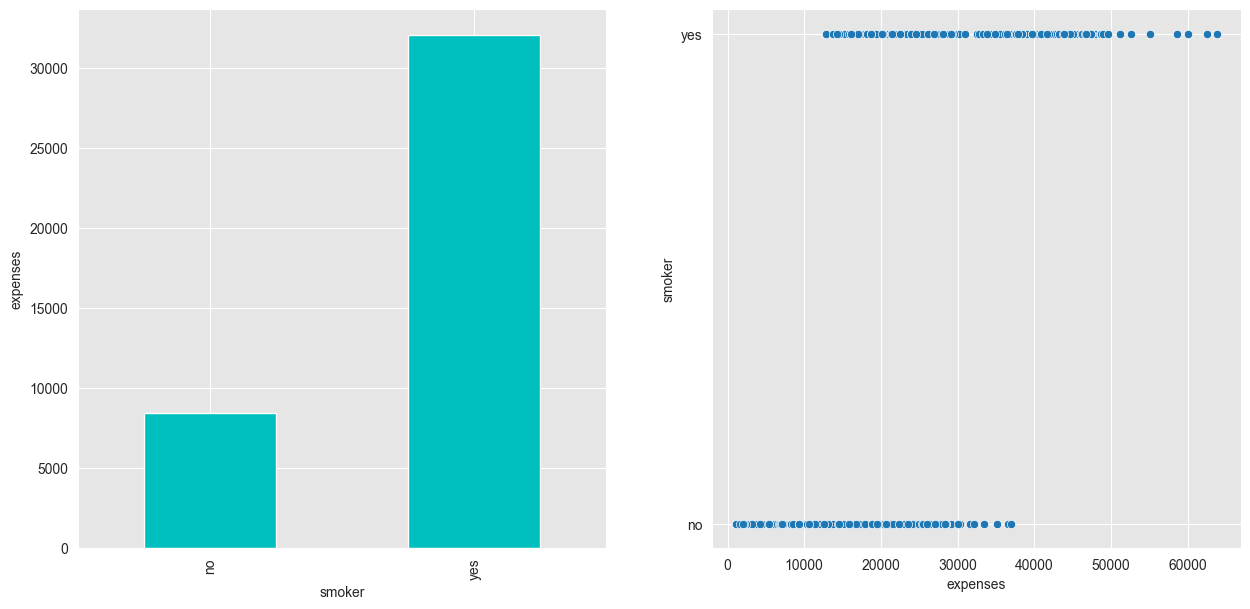

In [106]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(15,7)

data.groupby("smoker")['expenses'].mean().plot(ax= ax[0],ylabel="expenses", kind= 'bar',color='c')
sns.scatterplot(data["expenses"],data["smoker"],ax = ax[1])

 when a person has smoking habit the expenses are high

<AxesSubplot:xlabel='children', ylabel='expenses'>

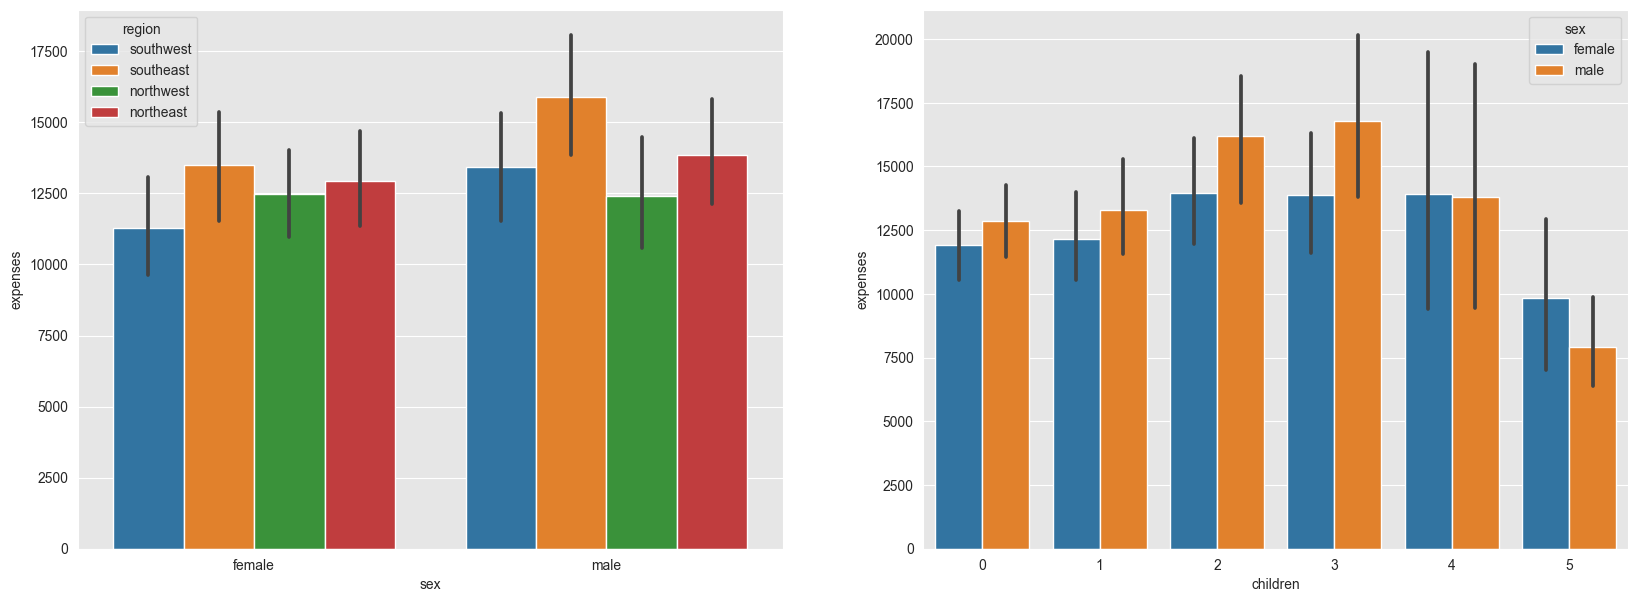

In [107]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(20,7)

sns.barplot(x = "sex", y = "expenses",hue='region', data = data,ax = ax[0])
sns.barplot(x = "children", y = "expenses",hue='sex', data = data, ax= ax[1])

<AxesSubplot:xlabel='expenses', ylabel='Count'>

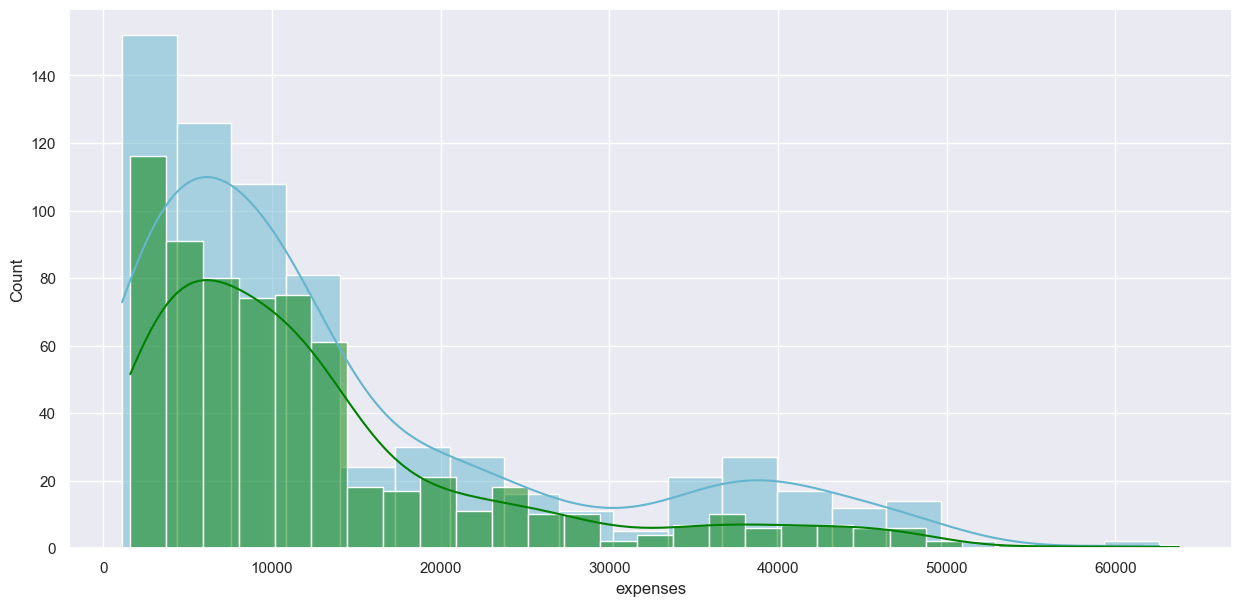

In [108]:
male = data[data["sex"]=='male']
female = data[data["sex"]=='female']

sns.set(rc = {'figure.figsize':(15,7)})
sns.histplot(male['expenses'],color= 'c',kde= True)
sns.histplot(female['expenses'],color= 'green',kde=True)

In [110]:
data["sex"]=='male'

0       False
1        True
2        True
3        True
4        True
        ...  
1333     True
1334    False
1335    False
1336    False
1337    False
Name: sex, Length: 1337, dtype: bool

<AxesSubplot:xlabel='region', ylabel='expenses'>

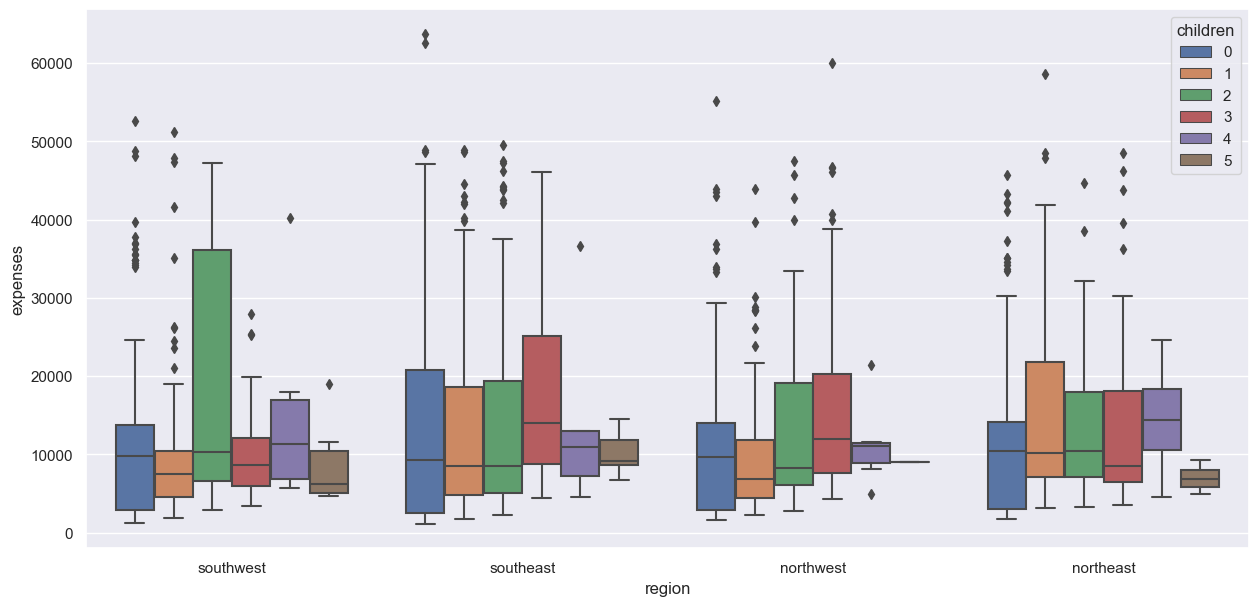

In [111]:
sns.boxplot(x='region',y='expenses',hue = 'children',data=data)


<AxesSubplot:xlabel='region', ylabel='expenses'>

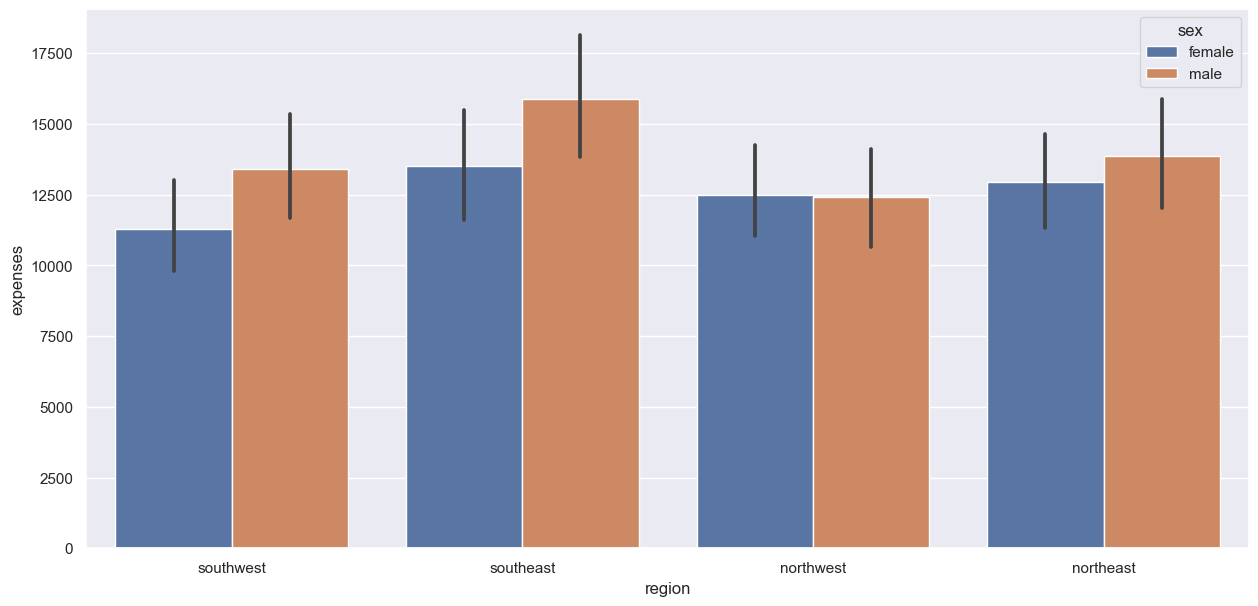

In [114]:
sns.barplot(x = "region", y = "expenses",hue='sex', data = insurance_df)

### Handling outlier in bmi

In [115]:
## this function perform imputaion with the mean of the variable where outliers are present

def detect_outlier(df,variable_name):
  outliers = []
  q1 = data["bmi"].quantile(0.25)
  q3 =data["bmi"].quantile(0.75)

  iqr = q3 - q1
  upper_fence = q3+ 1.5*iqr
  lower_fence = q1 - 1.5*iqr
  variable_mean = np.mean(df[variable_name])

  df[variable_name] = df[variable_name].apply(lambda x: variable_mean if(x<lower_fence or x>upper_fence) else x)
  return df

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'after imputing outliers')

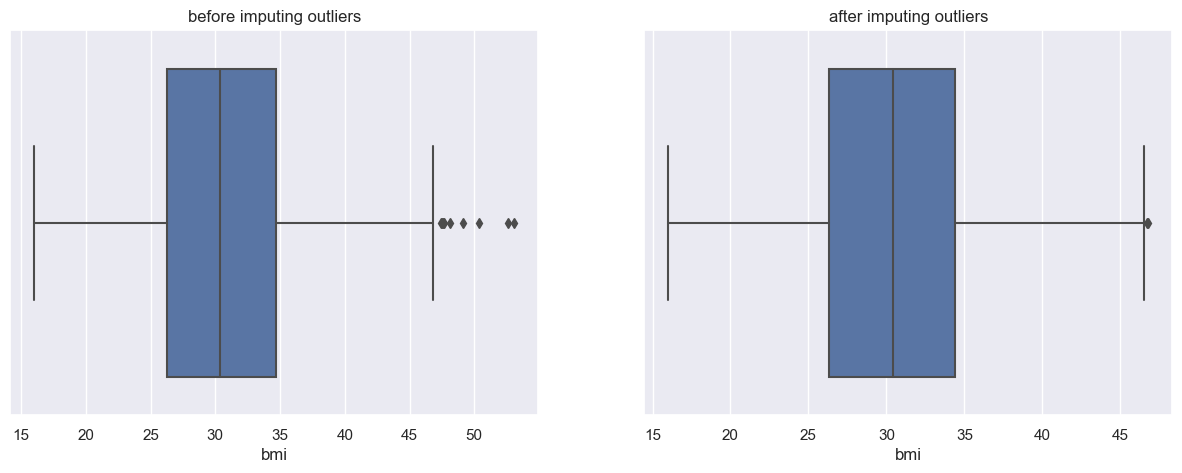

In [116]:
fig, ax =plt.subplots(1,2)
ax = ax.flatten()
fig.set_size_inches(15,5)

sns.boxplot(data["bmi"],ax = ax[0])
ax[0].set_title("before imputing outliers")
data = detect_outlier(data,'bmi')
sns.boxplot(data["bmi"],ax = ax[1])
ax[1].set_title("after imputing outliers")

In [117]:
x,y = data.drop(columns = ["expenses"]), data['expenses']
print(x.shape)
print(y.shape)

(1337, 6)
(1337,)


In [118]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [119]:
cat_col=[]
num_col = []
for col in x.columns:
  if x[col].dtype=="O":
    cat_col.append(col)
  else:
    num_col.append(col)

print(cat_col)
print(num_col)

['sex', 'smoker', 'region']
['age', 'bmi', 'children']
